- Hypothesis test
- Comment on power, sample size
- Maximised sample size to improve results

Political

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from scipy.stats import norm

import hypothesis_tests as ht
import api
import data_cleaning as dc
import hypothesis_full as hy
import visualizations as vis

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [17]:
# #Generate datapoints
aqi = ht.read_aqi24_data1()
lab_aqi, con_aqi = hy.aqi_by_group(aqi,'political','Lab','Cons')

In [18]:
# checkout how many data points in each sample
len(lab_aqi), len(con_aqi)
# len(lab_aqi) == len(con_aqi)

(480, 216)

In [6]:
#Rename variables
x1 = lab_aqi
x2 = con_aqi

In [7]:
# Find mean, variance and standard deviation of each sample
ht.sample_mu_std_var(x1), ht.sample_mu_std_var(x2)

((75.8875, 8.040771755041098, 64.65401041666668),
 (75.05092592592592, 7.782470751278994, 60.566850994513025))

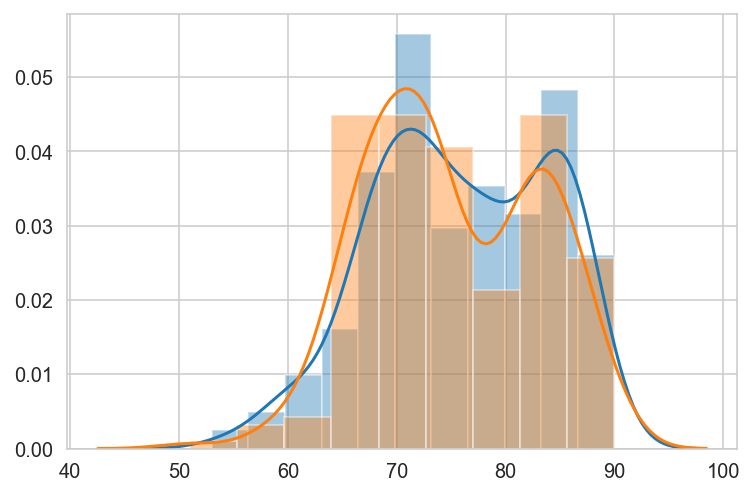

In [8]:
#Visually inspecting the distributions for differences in mean and standard deviation
vis.distplots(x1, x2)

In [9]:
# taking random sample of size 50, calculating the mean, repeating this 1000 times
x1_s = hy.create_sample_means(x1,1000)
x2_s = hy.create_sample_means(x2,1000)

In [10]:
#Compare new mean, standard deviation and variance
ht.sample_mu_std_var(x1_s), ht.sample_mu_std_var(x2_s)

((75.88380000000001, 1.168752480211272, 1.36598236),
 (74.99794, 1.088866638482418, 1.1856305564000005))

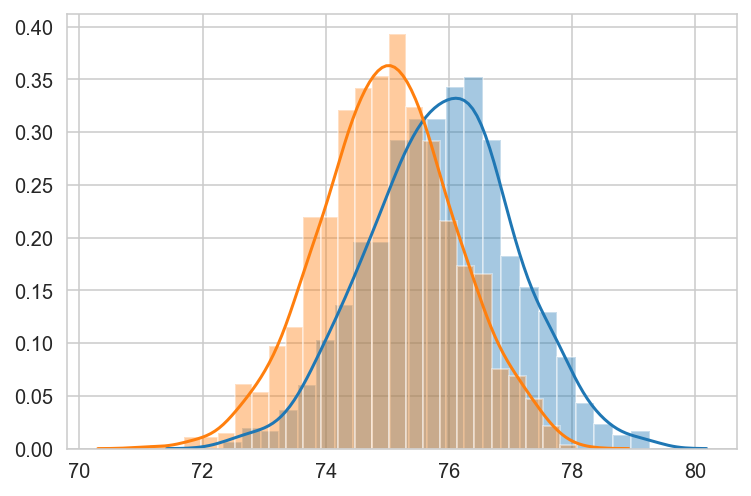

In [11]:
#Visually inspecting the distributions for differences in mean and standard deviation
vis.distplots(x1_s, x2_s)

In [12]:
#Finding the T Value and P Value
t = hy.welch_t(x1_s, x2_s)
df = hy.welch_df(x1_s, x2_s)
print(t, df)

p = hy.p_value(x1_s, x2_s, True)
print('p-value is: ', p)

hy.compare_pval_alpha(p, alpha = 0.025)

17.528325934416824 1988.0678652884142
p-value is:  0.0


'Reject'

In [13]:
#Calculate effect size
ht.Cohen_d(x1_s, x2_s)

0.7842828059099249